# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [10]:
 % matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#Read in the files

df = pd.read_csv('../data/human_body_temperature.csv')

### Exploratory Data Analysis

In [6]:
# Let us take a look at the tempareture
df.head()


,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [7]:
(rows,cols) = df.shape
print("There are a total of {} observations in the data set ".format(rows))

There are a total of 130 observations in the data set 


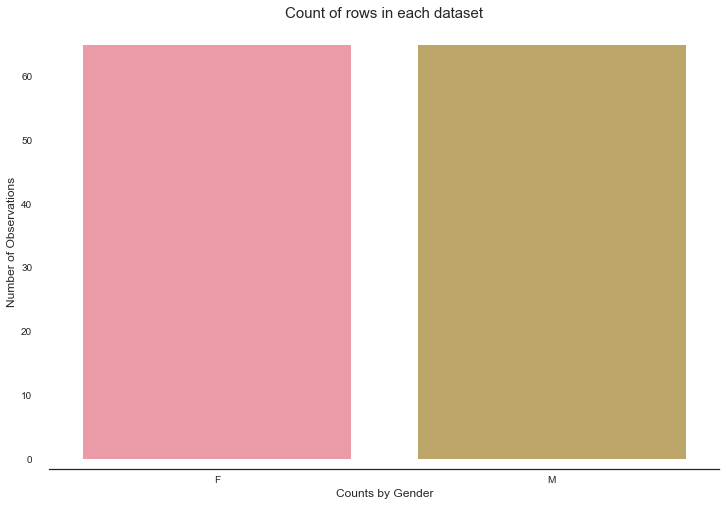

In [11]:
color = sns.color_palette()
sns.set(style="white")
cnt_srs = df.gender.value_counts()

plt.figure(figsize=(12,8))
with sns.color_palette("husl"):
 sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.ylabel('Number of Observations', fontsize=12)
plt.xlabel('Counts by Gender', fontsize=12)
plt.title('Count of rows in each dataset', fontsize=15)
plt.xticks(rotation='vertical')
sns.set_style("whitegrid")
sns.despine(offset=10)
sns.despine(left=True)

plt.show()

Fig1 : (above) There are a total of 130 observations that seem evenly split between M and F genders

In [49]:
mean_ht_all = np.mean(df.temperature)
df.head()
males_df = df[df['gender'] == 'M']
females_df = df[df['gender'] == 'F']

print("The mean human temperature  of males in the data set is {}".format(np.mean(males_df['temperature'])))
print("The mean human temperature  of females in the data set is {}".format(np.mean(females_df['temperature'])))

The mean human temperature  of males in the data set is 98.1046153846154
The mean human temperature  of females in the data set is 98.39384615384613


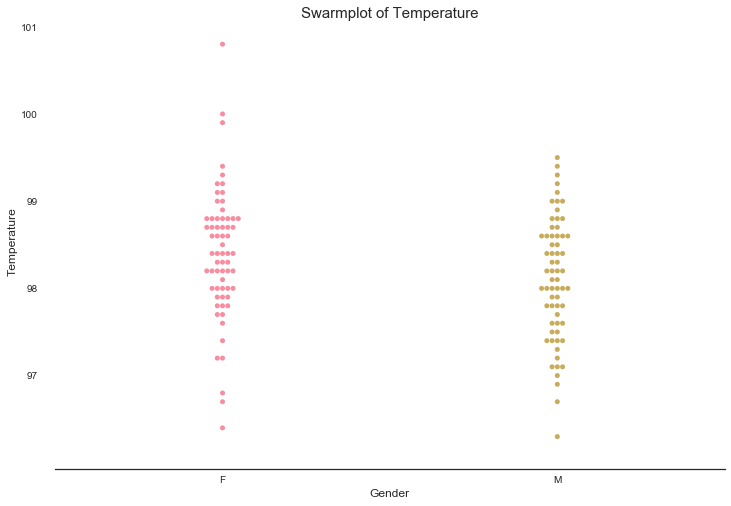

In [109]:
color = sns.color_palette()
sns.set(style="white")
#cnt_srs = df.gender.value_counts()

plt.figure(figsize=(12,8))
with sns.color_palette("husl"):
 sns.swarmplot(y="temperature", x="gender", alpha=0.8, data =df)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Temperature', fontsize=12)
plt.title('Swarmplot of Temperature', fontsize=15)
plt.xticks(rotation='vertical')
sns.set_style("whitegrid")
sns.despine(offset=10)
sns.despine(left=True)

plt.show()

Fig 1(b) : The swarm plots of Temperature measurements indicate a higher mean for Females compared to Males

### Is the Data Normallly distributed ?
Given a sample set, one can compute the studentized residuals and compare these to the expected frequency: points that fall more than 3 standard deviations from the norm are likely outliers (unless the sample size is significantly large, by which point one expects a sample this extreme), and if there are many points more than 3 standard deviations from the norm, one likely has reason to question the assumed normality of the distribution. This holds ever more strongly for moves of 4 or more standard deviations.

The "68–95–99.7 rule" is often used to quickly get a rough probability estimate of something, given its standard deviation, if the population is assumed to be normal. It is also as a simple test for outliers if the population is assumed normal, and as a normality test if the population is potentially not normal.


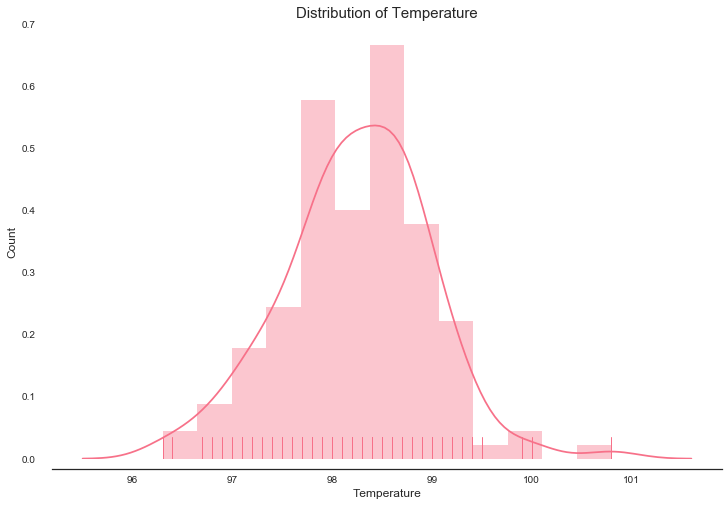

In [108]:
color = sns.color_palette()
sns.set(style="white")
#cnt_srs = df.gender.value_counts()

plt.figure(figsize=(12,8))
with sns.color_palette("husl"):
 sns.distplot(df['temperature'], rug='True')
#plt.hist(df[temperature])
plt.xlabel('Temperature', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Temperature', fontsize=15)
plt.xticks(rotation='vertical')
sns.set_style("whitegrid")
sns.despine(offset=10)
sns.despine(left=True)

plt.show()

Fig 2: (above) To get a rough idea if the data is normally distribued a plot of the distributions indicates a normal distribution with 2 peaks.

#### Does the 68–95–99.7 rule" hold ?

In [121]:
df_temp_mean = np.mean(df.temperature)
df_temp_sd = np.std(df.temperature)
print("The mean                   human temperature in the data set is {}".format(np.mean(df['temperature'])))
print("The standard deviation in  human temperature in the data set is {}".format(np.std(df['temperature'])))


temp_np_array = df.temperature.values

The mean                   human temperature in the data set is 98.24923076923078
The standard deviation in  human temperature in the data set is 0.7303577789050377


In [122]:
print('Number  of observations within three standard deviations of the mean:',
      len(temp_np_array[(temp_np_array >df_temp_mean-3*df_temp_sd) & (temp_np_array <df_temp_mean+3*df_temp_sd)]) )


print("Total number of observations is {}".format(len(df)))

print('Proportion of observations within three standard deviations of the mean:',
      len(temp_np_array[(temp_np_array>df_temp_mean-3*df_temp_sd) & (temp_np_array<df_temp_mean+3*df_temp_sd)])/len(temp_np_array))


Number  of observations within three standard deviations of the mean: 129
Total number of observations is 130
Proportion of observations within three standard deviations of the mean: 0.9923076923076923


Yes, the 68-95-99.7 rule holds.

 ### Are the observations in the sample independent ?

Two observations are independent if the occurrence of one observation provides no information about the occurrence of the other observation.  If the sample has observations measuring the temperature  of everyone  at a single point in time.  These should be unrelated observations.  However, if one were to measure one subject's temperature over time, these observations would be dependent because the temperature  at each time point would affect the temperature  at future time points depending on whether a patient is going into a fever, recovering from fever, has been given a fever-reducing medicine or is normal.
From  a temperature snapshot, the sample observations on Human temperature is independent
From the Heart Rate vs. Temperature point of view we see some correlation  see Fig 3 below.

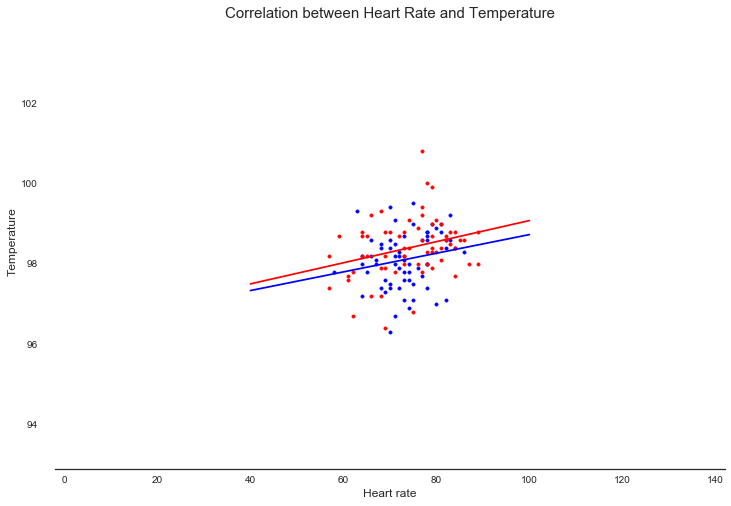

In [134]:
color = sns.color_palette()
sns.set(style="white")
#cnt_srs = df.gender.value_counts()

plt.figure(figsize=(12,8))
_ = plt.scatter(x=males_df['heart_rate'], y=males_df['temperature'], marker='.', color='blue')
_ = plt.scatter(x=females_df['heart_rate'], y=females_df['temperature'], marker='.', color='red')


_ = plt.xlabel('Heart rate', fontsize=12)
_ = plt.ylabel('Temperature', fontsize=12)
_ = plt.title('Correlation between Heart Rate and Temperature', fontsize=15)
_ = plt.xticks(rotation='vertical')

a_m, b_m = np.polyfit(males_df['heart_rate'],males_df['temperature'],1)
a_f, b_f = np.polyfit(females_df['heart_rate'],females_df['temperature'],1)


 
# Make theoretical line to plot
x = np.array([40,100])
y_m = a_m * x + b_m
y_f = a_f * x + b_f


# Add regression line to your plot
_ = plt.plot(x, y_m, color='blue')
 
_ = plt.plot(x, y_f, color='red')




plt.margins(0.7)
sns.set_style("whitegrid")
sns.despine(offset=10)
sns.despine(left=True)

plt.show()

Fig 3 : (above) There seems to be a positive correlation between heart_rate and temperature. The correlattion seems higher in females(red) than in males (blue)

In [190]:
def pearson_r(x,y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat=np.corrcoef(x,y)

    # Return entry [0,1]
    return corr_mat[0,1]


#### SUMMARY 
print("The pearson correlation of heart rate and  human temperature  in the data set is {}".format(pearson_r(df['heart_rate'],df['temperature'])))

print("The pearson correlation of heart rate and  human temperature  of Males in the data set is {}".format(pearson_r(males_df['heart_rate'],males_df['temperature'])))
print("The pearson correlation of heart rate and  human temperature  of Females in the data set is {}".format(pearson_r(females_df['heart_rate'],females_df['temperature'])))

The pearson correlation of heart rate and  human temperature  in the data set is 0.25365640272076423
The pearson correlation of heart rate and  human temperature  of Males in the data set is 0.195589375096875
The pearson correlation of heart rate and  human temperature  of Females in the data set is 0.2869311544971098


### Is the true population mean temperature 98.6 ?

H0 : The null      hypothesis : The population mean temperature is 98.6F .

Ha : The alternate hypotheses : The population mean temperature differs from 98.6F F.

In [234]:
print("From the random sample of 130  human subjects we know:")
print (" a) the mean of the sample is        : {}".format(np.mean(df.temperature)))
print (" b) the std dev of the sample is     : {}".format(np.std(df.temperature)))  
print (" c) the std dev of the population is : {}".format(np.std(df.temperature)/np.sqrt(len(df))))

From the random sample of 130  human subjects we know:
 a) the mean of the sample is        : 98.24923076923078
 b) the std dev of the sample is     : 0.7303577789050377
 c) the std dev of the population is : 0.06405661469519336


In [182]:
# Here func can be any replicate mean, std etc
def bootstrap_replicate_1d(data, func): 
     """Generate bootstrap replicate of 1D data."""
     bs_sample = np.random.choice(data, len(data))  
     return func(bs_sample)
      
## Create a function to draw the boot-strap samples
def draw_bs_reps(data, func, size=1):
    bs_replicates = np.empty(size)
    for i in range(size):
            bs_replicates[i] = bootstrap_replicate_1d(data, func)
            
    return bs_replicates
    

In [239]:
temp_np_array = np.array(df['temperature'])

bs_replicates  = draw_bs_reps(temp_np_array, np.mean, 50000)


In [240]:
# Compute the confidence interval
conf_int = np.percentile(bs_replicates,[2.5, 97.5])
# Print the confidence interval
print('95% confidence interval =', conf_int)



95% confidence interval = [ 98.12461538  98.37461538]


In [244]:
# Compute fraction of replicates that are greater
# population std deviation is 0.064 
p = (np.sum(bs_replicates <= (98.6 - 3* 0.064) ) +  np.sum(bs_replicates >= (98.6 + 3 * 0.064) ) )/ len(bs_replicates)

# Print the p-value
print('p = ', p)

p =  0.9935


In [206]:
 Therefore we accept the hypothesis that the the mean Human temperature is 98.6


10000

In [245]:
# Compute fraction of replicates that are greater
# population std deviation is 0.064 
p = (np.sum(bs_replicates <= (98.12461538) ) +  np.sum(bs_replicates >= (98.37461538) ) )/ len(bs_replicates)

# Print the p-value
print('p = ', p)

p =  0.04972


In [ ]:
Therefore we reject the Null hpothesis and 

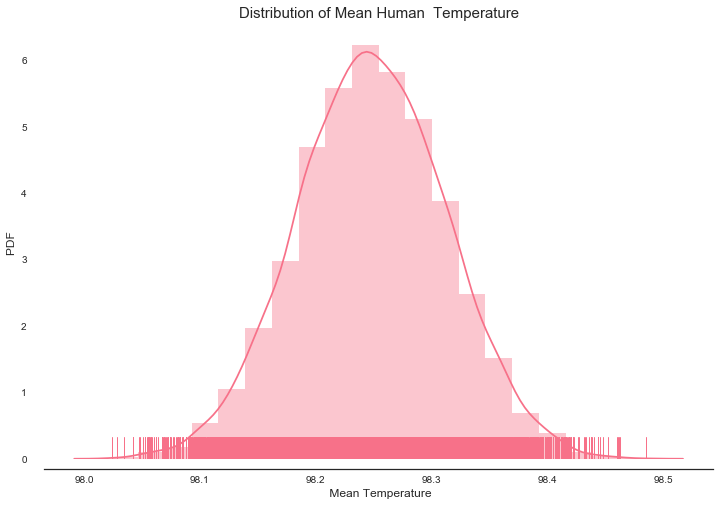

In [179]:
color = sns.color_palette()
sns.set(style="white")
#cnt_srs = df.gender.value_counts()

plt.figure(figsize=(12,8))
with sns.color_palette("husl"):
 sns.distplot(bs_replicates, rug='True', bins=20)
#plt.hist(df[temperature])
plt.xlabel(' Mean Temperature', fontsize=12)
plt.ylabel('PDF ', fontsize=12)
plt.title('Distribution of Mean Human  Temperature', fontsize=15)
plt.xticks(rotation='vertical')
sns.set_style("whitegrid")
sns.despine(offset=10)
sns.despine(left=True)

plt.show()